# Даалгавар 6

Text(0.5, 1.0, 'Histogram of Equalized 4')

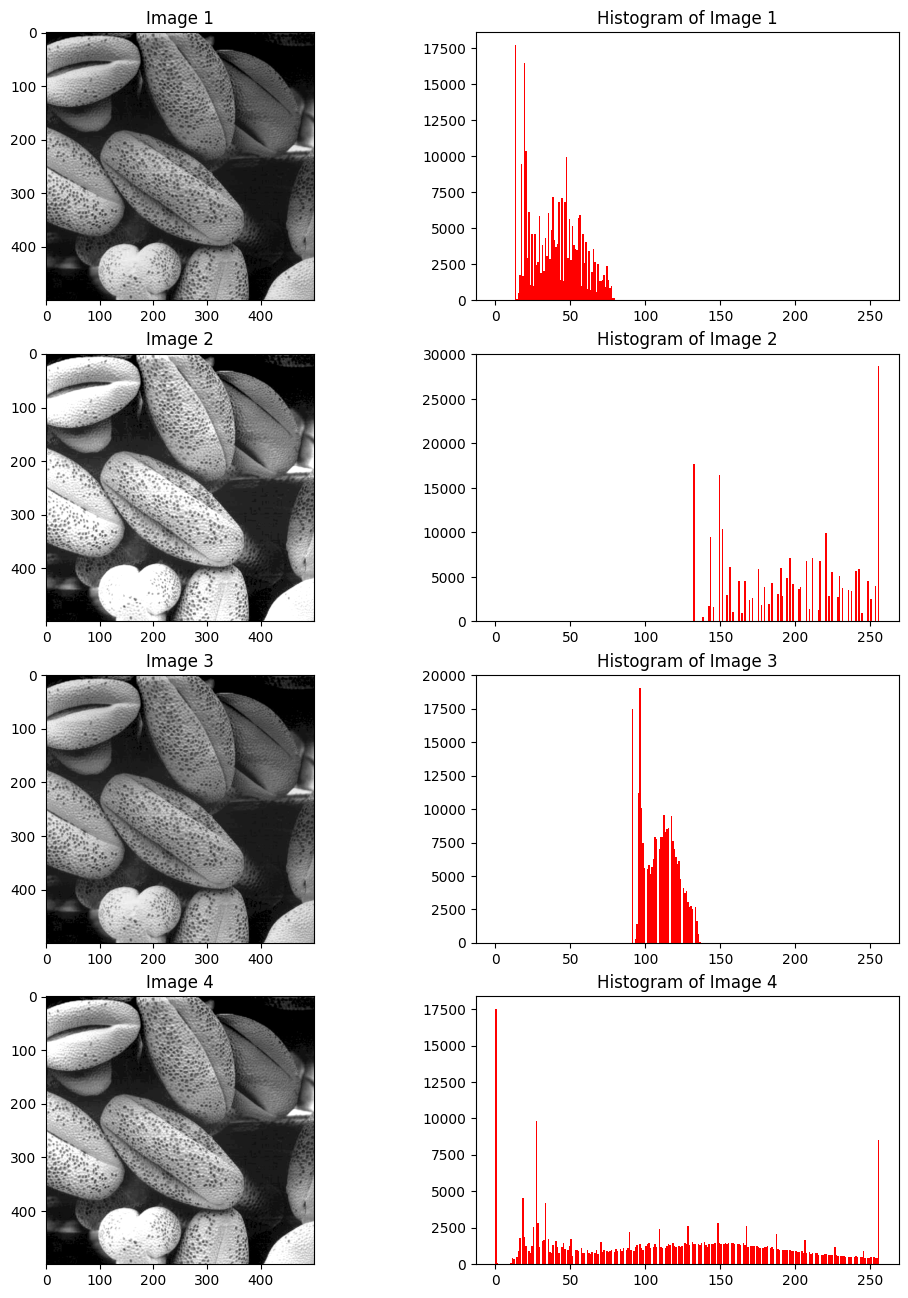

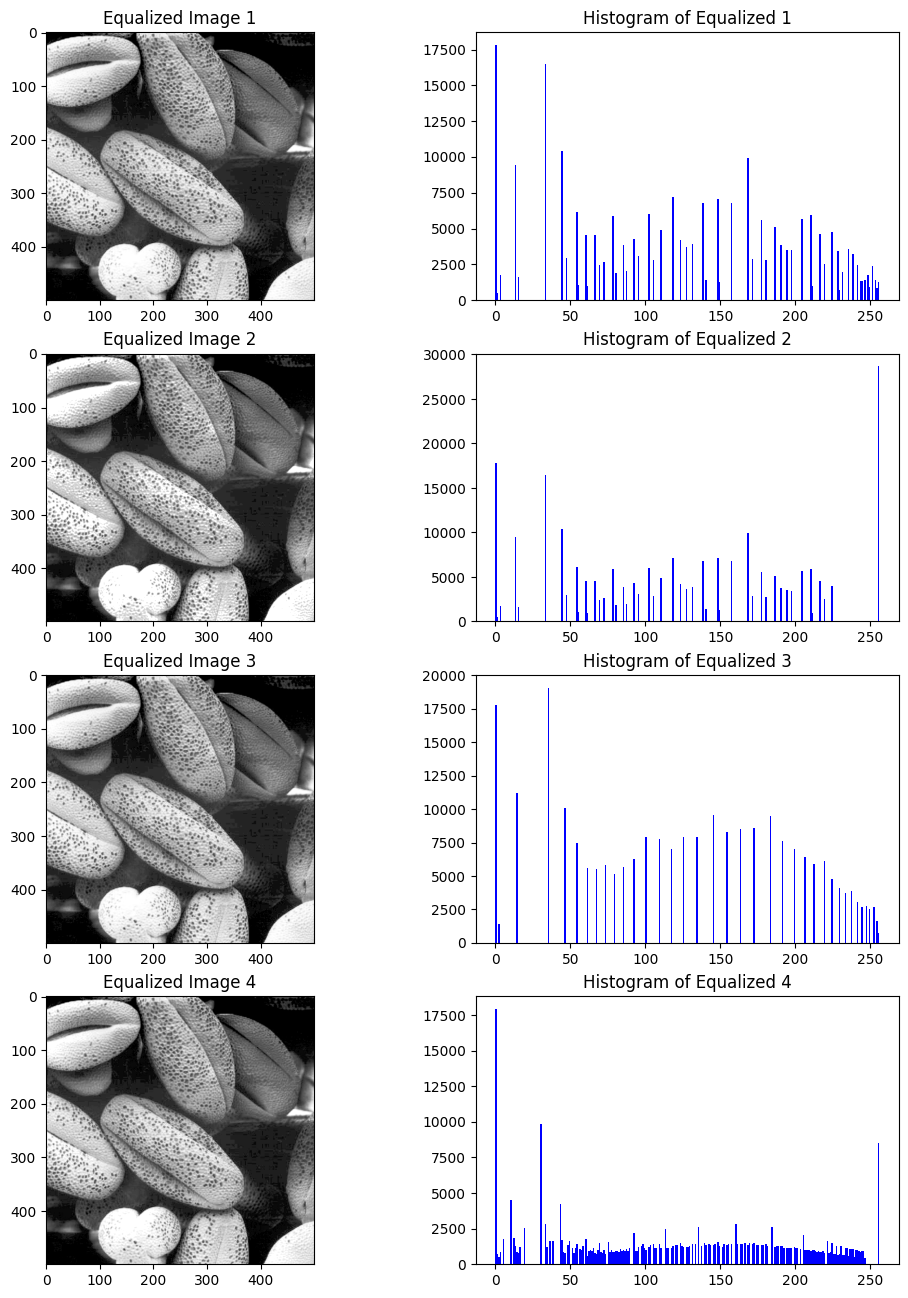

In [1]:
# Даалгавар 6
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('chap3/Fig0320(4)(bottom_left).tif', 0)
img2 = cv2.imread('chap3/Fig0320(1)(top_left).tif', 0)
img3 = cv2.imread('chap3/Fig0320(2)(2nd_from_top).tif', 0)
img4 = cv2.imread('chap3/Fig0320(3)(third_from_top).tif', 0)

equalized_img1 = cv2.equalizeHist(img1)
equalized_img2 = cv2.equalizeHist(img2)
equalized_img3 = cv2.equalizeHist(img3)
equalized_img4 = cv2.equalizeHist(img4)

fig, axs = plt.subplots(4, 2, figsize=(12, 16))

axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Image 1')
axs[1, 0].imshow(img2, cmap='gray')
axs[1, 0].set_title('Image 2')
axs[2, 0].imshow(img3, cmap='gray')
axs[2, 0].set_title('Image 3')
axs[3, 0].imshow(img4, cmap='gray')
axs[3, 0].set_title('Image 4')

axs[0, 1].hist(img1.ravel(), 256, [0, 256], color='r')
axs[0, 1].set_title('Histogram of Image 1')
axs[1, 1].hist(img2.ravel(), 256, [0, 256], color='r')
axs[1, 1].set_title('Histogram of Image 2')
axs[2, 1].hist(img3.ravel(), 256, [0, 256], color='r')
axs[2, 1].set_title('Histogram of Image 3')
axs[3, 1].hist(img4.ravel(), 256, [0, 256], color='r')
axs[3, 1].set_title('Histogram of Image 4')

fig2, axs2 = plt.subplots(4, 2, figsize=(12, 16))

axs2[0, 0].imshow(equalized_img1, cmap='gray')
axs2[0, 0].set_title('Equalized Image 1')
axs2[1, 0].imshow(equalized_img2, cmap='gray')
axs2[1, 0].set_title('Equalized Image 2')
axs2[2, 0].imshow(equalized_img3, cmap='gray')
axs2[2, 0].set_title('Equalized Image 3')
axs2[3, 0].imshow(equalized_img4, cmap='gray')
axs2[3, 0].set_title('Equalized Image 4')

axs2[0, 1].hist(equalized_img1.ravel(), 256, [0, 256], color = 'b')
axs2[0, 1].set_title('Histogram of Equalized 1')
axs2[1, 1].hist(equalized_img2.ravel(), 256, [0, 256], color = 'b')
axs2[1, 1].set_title('Histogram of Equalized 2')
axs2[2, 1].hist(equalized_img3.ravel(), 256, [0, 256], color = 'b')
axs2[2, 1].set_title('Histogram of Equalized 3')
axs2[3, 1].hist(equalized_img4.ravel(), 256, [0, 256], color = 'b')
axs2[3, 1].set_title('Histogram of Equalized 4')

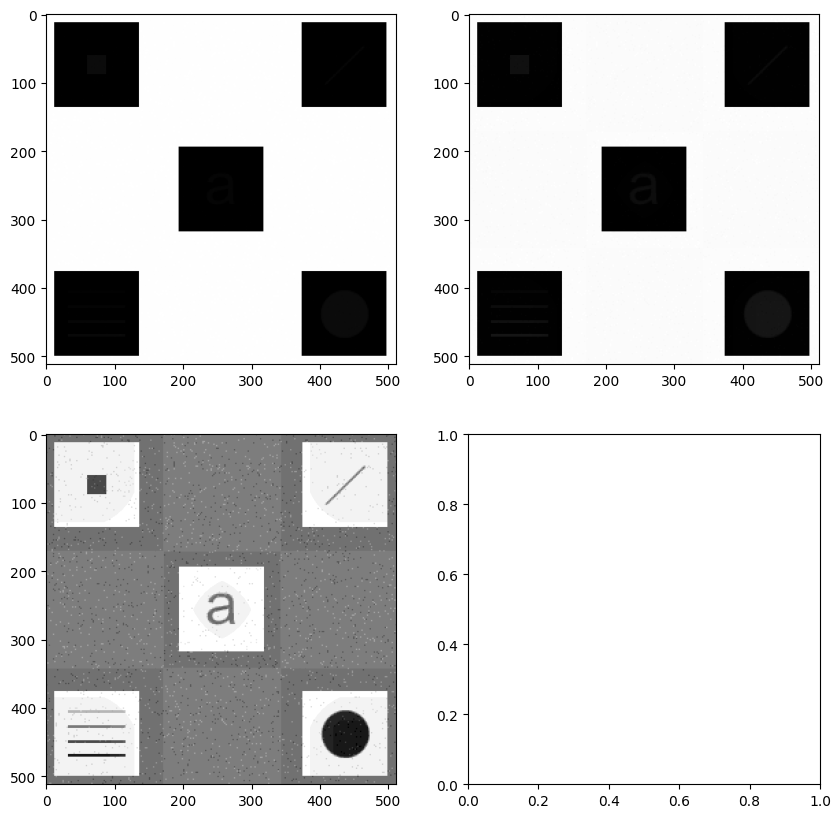

In [2]:
# Даалгавар 7
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('chap3/Fig0326(a)(embedded_square_noisy_512).tif', 0)

clahe: cv2.CLAHE = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
enhanced = clahe.apply(img)
equalization = np.uint8(enhanced * 250) # type: ignore

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 1].imshow(enhanced, cmap='gray')
axs[1, 0].imshow(equalization, cmap='gray')

### Дараах 5 даалгаврыг гүйцэтгэсэн тайлангаа илгээнэ үү?

### Histogram Processing (Лекц 2-ийн Слайд-28-32)

### Local Enhancement  (Лекц 2-ийн Слайд-35)

### Enhancement using Arithmetic / Logic Operations (Лекц 2-ийн Слайд-37)

### Smoothing Linear Filters (Лекц 2-ийн Слайд-42)

### Smoothing Linear Filters (Лекц 2-ийн Слайд-43)

### Амжилт хүсье.

In [89]:
# Даалгавар 8 Enhancement using Arithmetic / Logic Operations (Лекц 2-ийн Слайд-37)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
img = cv2.imread('chap4/castle.png', 0)


mask = np.full_like(img, 0)
mask[5:100, 90:135] = 255

or_mask = np.full_like(img, 255)
or_mask[5:100, 90:135] = 0

masked_img = cv2.bitwise_and(img, mask)
or_masked_img = cv2.bitwise_or(img, or_mask)
# create folder if does not exists
os.makedirs('result/daalgavar8', exist_ok=True)
cv2.imwrite('result/daalgavar8/bitwise_and.png', masked_img)
cv2.imwrite('result/daalgavar8/bitwise_or.png', or_masked_img)

True

In [98]:
# Даалгавар 9 ### Smoothing Linear Filters (Лекц 2-ийн Слайд-42) 

img = cv2.imread('chap3/Fig0333(a)(test_pattern_blurring_orig).tif', 0)
kernel_sizes = [3,5,9,15,35]
os.makedirs('result/daalgavar9', exist_ok=True)
for kernel_size in kernel_sizes:
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    dst = cv2.filter2D(img, -1, kernel)
    cv2.imwrite(f'result/daalgavar9/{kernel_size}.png', dst)

# davtaltaaar
dst = np.zeros_like(img)
for kernel_size in kernel_sizes:
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    padded_img = np.pad(img, (kernel_size//2, kernel_size//2), 'constant')
    for each_row in range(img.shape[0]):
        for each_col in range(img.shape[1]):
            dst[each_row,each_col] = np.sum(kernel * padded_img[each_row:each_row+kernel_size, each_col:each_col+kernel_size]) # type: ignore
    cv2.imwrite(f'result/daalgavar9/{kernel_size}_davtalt.png', dst)
                

In [100]:
# Даалгавар 10 Smoothing Linear Filters (Лекц 2-ийн Слайд-43)

img = cv2.imread('chap3/Fig0334(a)(hubble-original).tif')
os.makedirs('result/daalgavar10', exist_ok=True)

# Гауссын blur
gaussian_blur = cv2.GaussianBlur(img, (15, 15), 0)

# Thresholding
gray = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

cv2.imwrite('result/daalgavar10/gaussian_blur.png', gaussian_blur)
cv2.imwrite('result/daalgavar10/threshold.png', threshold)  

True